In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import toolbox as tb

In [11]:
np.random.seed(43)
A = np.random.normal(1,1, size=(2,2))
Sigma = A.T@A
X = np.random.multivariate_normal([4,7], Sigma, size=100)

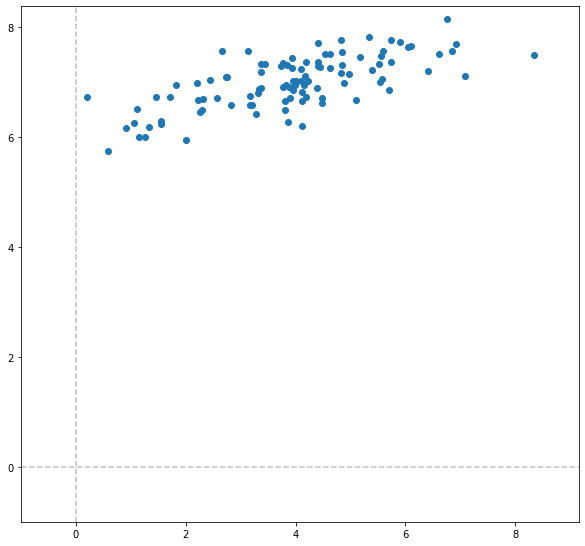

In [12]:
tb.scatter_points(X, show_origin=True, equal_scale=True)

# SVD

In [52]:
U,S,V = np.linalg.svd(X, full_matrices=False)

In [53]:
print(f"U shape: {U.shape}")
print(f"S shape: {S.shape}")
print(f"V shape: {V.shape}")

U shape: (100, 2)
S shape: (2,)
V shape: (2, 2)


In [54]:
# check constraints satisfied

In [55]:
assert np.allclose(U@np.diag(S)@V,X)
assert np.allclose(U.T@U, np.eye(U.shape[1]))
assert np.allclose(V.T@V, np.eye(V.shape[1]))

Note that to put together again it is $USV$ instead of $USV^T$

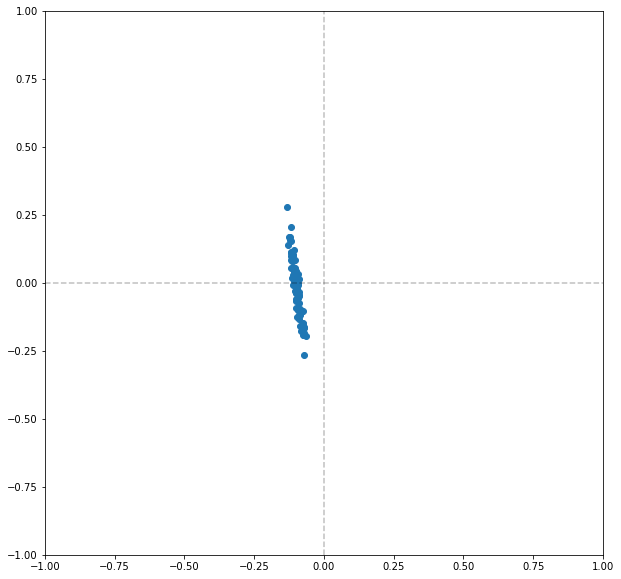

In [62]:
tb.scatter_points(U, show_origin=True)

### Relate to XTX

In [56]:
eig_values, eig_vectors = np.linalg.eig(X.T@X)

In [57]:
assert np.allclose(S,np.sort(np.sqrt(eig_values))[::-1])

In [50]:
eig_vectors

array([[-0.86286864, -0.50542825],
       [ 0.50542825, -0.86286864]])

In [51]:
V

array([[-0.50542825, -0.86286864],
       [ 0.86286864, -0.50542825]])

# PCA

### Sklearn

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [18]:
principalDf

,principal component 1,principal component 2
0,-1.149459,0.166019
1,-0.632662,-0.725636
2,-1.729949,0.175205
3,0.578111,-0.152271
4,2.473848,0.334216
...,...,...
95,0.177988,0.024374
96,-0.213584,0.465183
97,-0.589130,0.000910
98,-2.842577,-0.129030


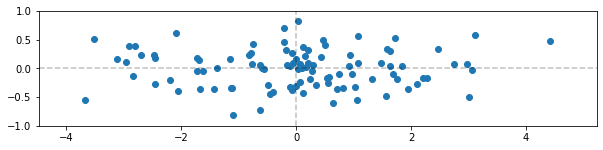

In [20]:
tb.scatter_points(principalComponents, show_origin=True, equal_scale=True)

### numpy equivalent

### compare to regression

In [24]:
lrmod = tb.linear_model(X[:,0], X[:,1], add_constant=False, verbose=False)

In [29]:
lrmod.params[0]

1.5653719809009703

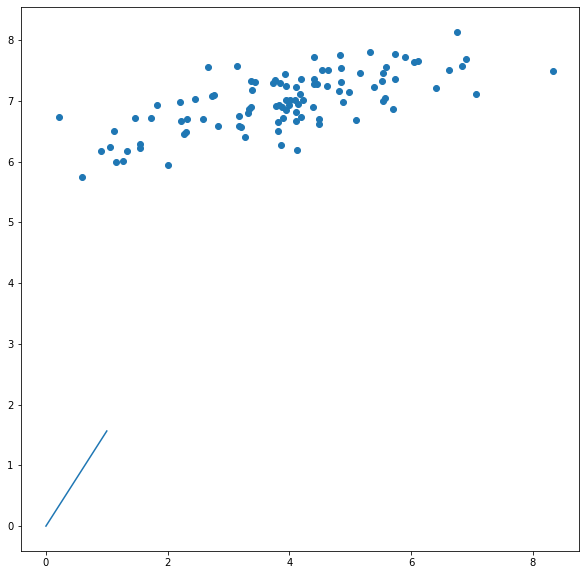

In [32]:
tb.scatter_points(X)
plt.plot([0,1], [0,lrmod.params[0]])